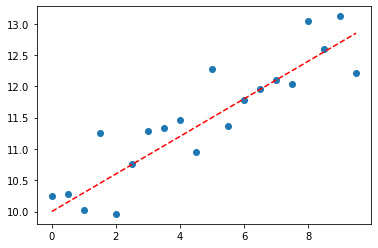

In [34]:
import numpy as np
import scipy
import math
import random
random.seed(32)
from matplotlib import pyplot as plt
x = np.arange(0,10,0.5)

y_real = np.array([i*0.3+10 for i in x])
y_sampled = np.array([(i+random.gauss(0,0.4)) for i in y_real])
plt.plot(x,y_real,label='real',ls='--',c='r')
plt.scatter(x,y_sampled,label='sampled')
plt.show()

In [35]:
# Reshaping our matrices and adding on a intercept

x = x.reshape(-1,1)
x = np.concatenate([x,np.ones((len(x),1))],axis=1)
y_sampled = y_sampled.reshape(-1,1)

In [36]:
# running the regression using the normal equation
beta = scipy.linalg.inv(x.T@x)@(x.T)@y_sampled
beta

array([[ 0.28641421],
       [10.14329575]])

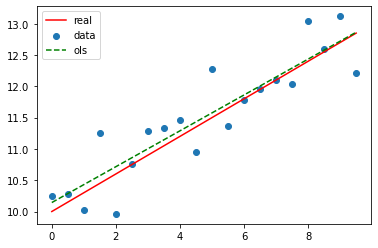

In [37]:
pred_y = x@beta

plt.plot(x[:,0].ravel(),y_real,label='real',ls='-',c='r')
plt.scatter(x[:,0].ravel(),y_sampled,label='data')
plt.plot(x[:,0].ravel(),pred_y,label='ols',c='g',ls='--')
plt.legend()
plt.show()

In [38]:
resid = pred_y - y_sampled
sigma2 = np.sum(resid**2)/(len(x)-2)
sigma2

0.18099157761950171

In [39]:
covar_exog_matrix = np.dot(x,x.T)
covar_exog_matrix.shape

(20, 20)

In [40]:
covar_exog_matrix = np.dot(x.T,x)
covar_exog_matrix.shape

(2, 2)

In [41]:
covar_exog_matrix

array([[617.5,  95. ],
       [ 95. ,  20. ]])

In [42]:
math.sqrt(sigma2/math.sqrt(covar_exog_matrix[0,0]))

0.08534340030800057

In [43]:
math.sqrt(sigma2/math.sqrt(covar_exog_matrix[1,1]))

0.201173922492985

In [ ]:
pred_ols = model.predict_with_intervals(X)
pred_ols
iv_l = pred_ols["iv_l"].values.ravel()
iv_u = pred_ols["iv_u"].values.ravel()
mean = pred_ols["mean"].values.ravel()

In [64]:
# Statsmodel version
import statsmodels.api as sm

class LinearRegressionSM:
    def __init__(self,X,y,*args,**kwargs):
        self.ols = sm.OLS(X,y,*args,**kwargs)
        self.ols_fitted = None
        
    def fit(self,*args,**kwargs):
        self.ols_fitted = self.ols.fit(*args,**kwargs)
        return self
    
    def predict(self,X,*args,**kwargs):
        return self.ols_fitted.predict(exog=X,*args,**kwargs)
    
    def predict_with_intervals(self,X,alpha=0.05):
        #yhat = self.predict(X).ravel()
        predictions = self.ols_fitted.get_prediction(exog=X)
        summary_frame = predictions.summary_frame(alpha=alpha)
        results = {
            'iv_l':summary_frame["obs_ci_lower"],
            'mean':summary_frame["mean"],
            'iv_u':summary_frame["obs_ci_upper"],
        }

        return results
    
    def summary(self,*args,**kwargs):
        return self.ols_fitted.summary()

In [65]:
from statsmodels.api import OLS

model = LinearRegressionSM(y_sampled,x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     75.35
Date:                Sun, 28 May 2023   Prob (F-statistic):           7.52e-08
Time:                        21:08:51   Log-Likelihood:                -10.232
No. Observations:                  20   AIC:                             24.46
Df Residuals:                      18   BIC:                             26.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2864      0.033      8.681      0.000       0.217       0.356
const         10.1433      0.183     55.326      0.000       9.758      10.528
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   2.915
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.356
Skew:                           0.039   Prob(JB):                        0.837
Kurtosis:                       2.352   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

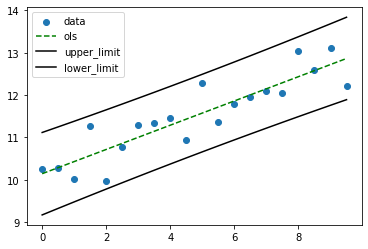

In [66]:
pred_ols = model.predict_with_intervals(x)
pred_ols
iv_l = pred_ols["iv_l"].values.ravel()
iv_u = pred_ols["iv_u"].values.ravel()
mean = pred_ols["mean"].values.ravel()


#plt.plot(x[:,0].ravel(),y_real,label='real',ls='-',c='r')
plt.scatter(x[:,0].ravel(),y_sampled,label='data')
plt.plot(x[:,0].ravel(),mean,label='ols',c='g',ls='--')
plt.plot(x[:,0].ravel(),iv_u,label='upper_limit',c='k',ls='-')
plt.plot(x[:,0].ravel(),iv_l,label='lower_limit',c='k',ls='-')
plt.legend()
plt.show()

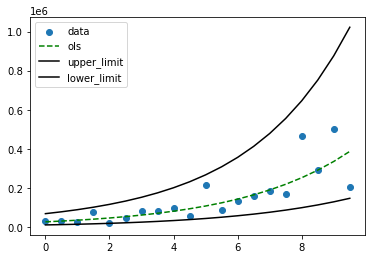

In [67]:
pred_ols = model.predict_with_intervals(x)
pred_ols
iv_l = pred_ols["iv_l"].values.ravel()
iv_u = pred_ols["iv_u"].values.ravel()
mean = pred_ols["mean"].values.ravel()


#plt.plot(x[:,0].ravel(),y_real,label='real',ls='-',c='r')
plt.scatter(x[:,0].ravel(),np.exp(y_sampled),label='data')
plt.plot(x[:,0].ravel(),np.exp(mean),label='ols',c='g',ls='--')
plt.plot(x[:,0].ravel(),np.exp(iv_u),label='upper_limit',c='k',ls='-')
plt.plot(x[:,0].ravel(),np.exp(iv_l),label='lower_limit',c='k',ls='-')
plt.legend()
plt.show()

In [149]:
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

class LinearRegressionPlus(LinearRegression):

    def fit(self,X,y,*args,**kwargs):
        ''' extending the functionality of what the fit function.'''
        super().fit(X,y)

        self.residuals = y - self.predict(X)
        self.residuals_std = np.sqrt((np.sum(self.residuals**2))/(len(y)-2))
    
    def get_stats():
        pass

    def predict_intervals(self,X,p_interval = 0.95):
        predictions = self.predict(X)
        z = abs(norm.ppf((1-p_interval)/2))
        lower = predictions - z*self.residuals_std
        upper = predictions + z*self.residuals_std
        return lower, predictions,upper


reg = LinearRegressionPlus()
reg.fit(x,y_sampled)

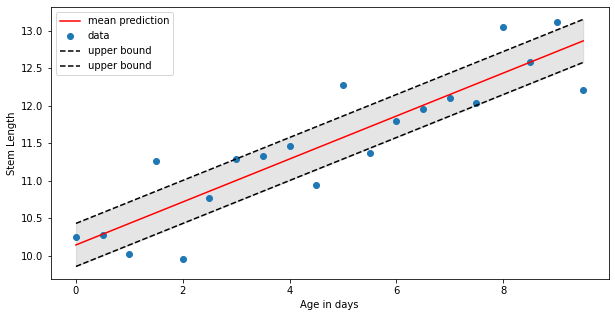

In [162]:
import pandas as pd
l,p,u = reg.predict_intervals(x,p_interval=0.5)
df_pred = pd.DataFrame({'lower':l.ravel(),'mean':p.ravel(),'upper':u.ravel()},index=x[:,0].ravel())

fig,axes = plt.subplots(1,1,figsize=[10,5])

df_pred['mean'].plot(ax=axes,c='r',label='mean prediction')
axes.fill_between(x[:,0].ravel(), l.ravel(), u.ravel(),color='gray',alpha=0.2)
axes.scatter(x[:,0].ravel(),y_sampled.ravel(),label='data')
axes.plot(x[:,0].ravel(),u.ravel(),c='k',ls='--',label='upper bound')
axes.plot(x[:,0].ravel(),l.ravel(),c='k',ls='--',label='lower bound')
axes.set_xlabel('Age in days')
axes.set_ylabel('Stem Length')
plt.legend()
plt.show()